# 📊 Notebook 2: Visualización de Datos para Predicción de Precios de Casas

## 🎯 Objetivos del Notebook
En este notebook aprenderemos a:
1. **Crear visualizaciones efectivas** para entender nuestros datos
2. **Analizar distribuciones** de variables mediante histogramas
3. **Explorar relaciones** entre variables con gráficos de dispersión
4. **Identificar patrones** mediante mapas de calor y gráficos de correlación
5. **Interpretar resultados** de las visualizaciones para tomar decisiones

## 📈 ¿Por qué son importantes las visualizaciones?
Las **visualizaciones** nos permiten:
- 👁️ **Ver patrones** que no son evidentes en números
- 🔍 **Detectar outliers** y anomalías
- 📐 **Entender distribuciones** de nuestras variables
- 🤝 **Comunicar resultados** de manera efectiva
- 💡 **Generar hipótesis** sobre nuestros datos

## 📚 1. Importación de Librerías

Importamos las librerías necesarias para crear visualizaciones profesionales:
- **matplotlib**: Librería base para gráficos en Python
- **seaborn**: Librería de visualización estadística (basada en matplotlib)
- **pandas**: Para manipulación de datos
- **numpy**: Para operaciones matemáticas

In [1]:
# Importamos las librerías necesarias para visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuramos el estilo de las visualizaciones
plt.style.use('default')  # Estilo limpio y profesional
sns.set_palette("husl")   # Paleta de colores atractiva

# Configuramos el tamaño de las figuras por defecto
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 11

# Suprimimos advertencias para una salida más limpia
warnings.filterwarnings("ignore")

print("✅ Librerías de visualización importadas y configuradas correctamente")

✅ Librerías de visualización importadas y configuradas correctamente


## 📂 2. Carga de Datos Limpios

Cargamos el dataset limpio que preparamos en el Notebook 1:

In [2]:
# Cargamos el dataset limpio del Notebook anterior
try:
    df = pd.read_csv("../Data/USA_Housing_Clean.csv")
    print("✅ Dataset limpio cargado exitosamente")
except FileNotFoundError:
    # Si no existe el archivo limpio, cargamos el original y lo limpiamos
    print("⚠️ Archivo limpio no encontrado. Cargando y limpiando datos originales...")
    df = pd.read_csv("../Data/USA_Housing.csv")
    df = df.drop(columns=["Address"])
    df.to_csv("../Data/USA_Housing_Clean.csv", index=False)
    print("✅ Datos cargados y limpiados")

print(f"📊 Forma del dataset: {df.shape[0]} filas y {df.shape[1]} columnas")
print(f"📋 Columnas disponibles: {list(df.columns)}")

✅ Dataset limpio cargado exitosamente
📊 Forma del dataset: 5000 filas y 6 columnas
📋 Columnas disponibles: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']


## 📈 3. Análisis de la Distribución de la Variable Objetivo

### 3.1 Distribución del Precio de las Casas
Comenzamos analizando la distribución de nuestra variable objetivo (precio):

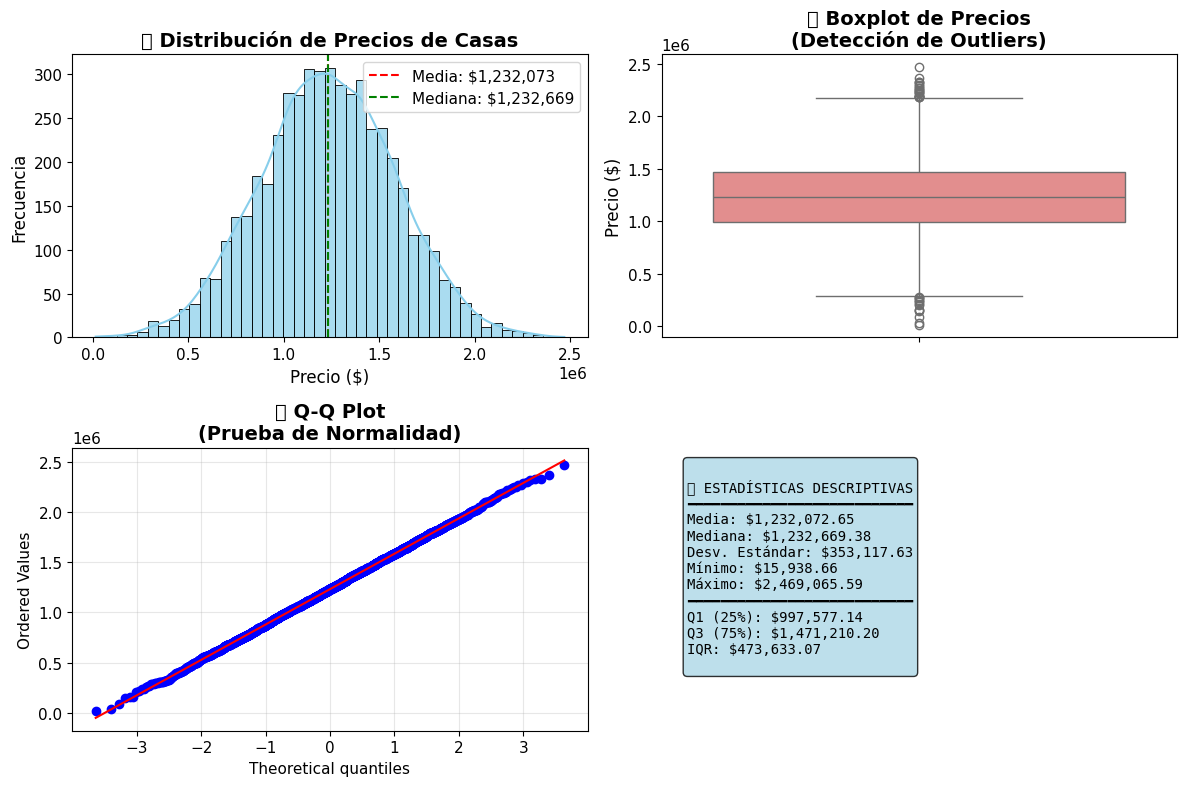


🔍 ANÁLISIS DE LA DISTRIBUCIÓN DE PRECIOS:
📐 Asimetría (Skewness): -0.003
   ✅ Distribución aproximadamente simétrica
📏 Curtosis: -0.055
   ✅ Distribución mesocúrtica (similar a la normal)


In [3]:
# Creamos un histograma de la distribución de precios
plt.figure(figsize=(12, 8))

# Subplot 1: Histograma con curva de densidad
plt.subplot(2, 2, 1)
sns.histplot(df['Price'], kde=True, color='skyblue', alpha=0.7)
plt.title('📊 Distribución de Precios de Casas', fontsize=14, fontweight='bold')
plt.xlabel('Precio ($)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Añadimos líneas para media y mediana
plt.axvline(df['Price'].mean(), color='red', linestyle='--', label=f'Media: ${df["Price"].mean():,.0f}')
plt.axvline(df['Price'].median(), color='green', linestyle='--', label=f'Mediana: ${df["Price"].median():,.0f}')
plt.legend()

# Subplot 2: Boxplot para identificar outliers
plt.subplot(2, 2, 2)
sns.boxplot(y=df['Price'], color='lightcoral')
plt.title('📦 Boxplot de Precios\n(Detección de Outliers)', fontsize=14, fontweight='bold')
plt.ylabel('Precio ($)', fontsize=12)

# Subplot 3: Q-Q Plot para normalidad
from scipy import stats
plt.subplot(2, 2, 3)
stats.probplot(df['Price'], dist="norm", plot=plt)
plt.title('📐 Q-Q Plot\n(Prueba de Normalidad)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Subplot 4: Estadísticas descriptivas
plt.subplot(2, 2, 4)
plt.axis('off')
stats_text = f"""
📊 ESTADÍSTICAS DESCRIPTIVAS
━━━━━━━━━━━━━━━━━━━━━━━━━━━
Media: ${df['Price'].mean():,.2f}
Mediana: ${df['Price'].median():,.2f}
Desv. Estándar: ${df['Price'].std():,.2f}
Mínimo: ${df['Price'].min():,.2f}
Máximo: ${df['Price'].max():,.2f}
━━━━━━━━━━━━━━━━━━━━━━━━━━━
Q1 (25%): ${df['Price'].quantile(0.25):,.2f}
Q3 (75%): ${df['Price'].quantile(0.75):,.2f}
IQR: ${df['Price'].quantile(0.75) - df['Price'].quantile(0.25):,.2f}
"""
plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', fontsize=10, fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

# Análisis de la distribución
print("\n🔍 ANÁLISIS DE LA DISTRIBUCIÓN DE PRECIOS:")
print("=" * 50)
skewness = df['Price'].skew()
kurtosis = df['Price'].kurtosis()

print(f"📐 Asimetría (Skewness): {skewness:.3f}")
if abs(skewness) < 0.5:
    print("   ✅ Distribución aproximadamente simétrica")
elif skewness > 0:
    print("   📈 Distribución sesgada hacia la derecha (cola larga hacia valores altos)")
else:
    print("   📉 Distribución sesgada hacia la izquierda (cola larga hacia valores bajos)")

print(f"📏 Curtosis: {kurtosis:.3f}")
if abs(kurtosis) < 0.5:
    print("   ✅ Distribución mesocúrtica (similar a la normal)")
elif kurtosis > 0:
    print("   📊 Distribución leptocúrtica (más apuntada que la normal)")
else:
    print("   📊 Distribución platicúrtica (más aplanada que la normal)")

## 🔗 4. Mapa de Correlación

### 4.1 Análisis Visual de Correlaciones
Creamos un mapa de calor para visualizar las correlaciones entre variables:

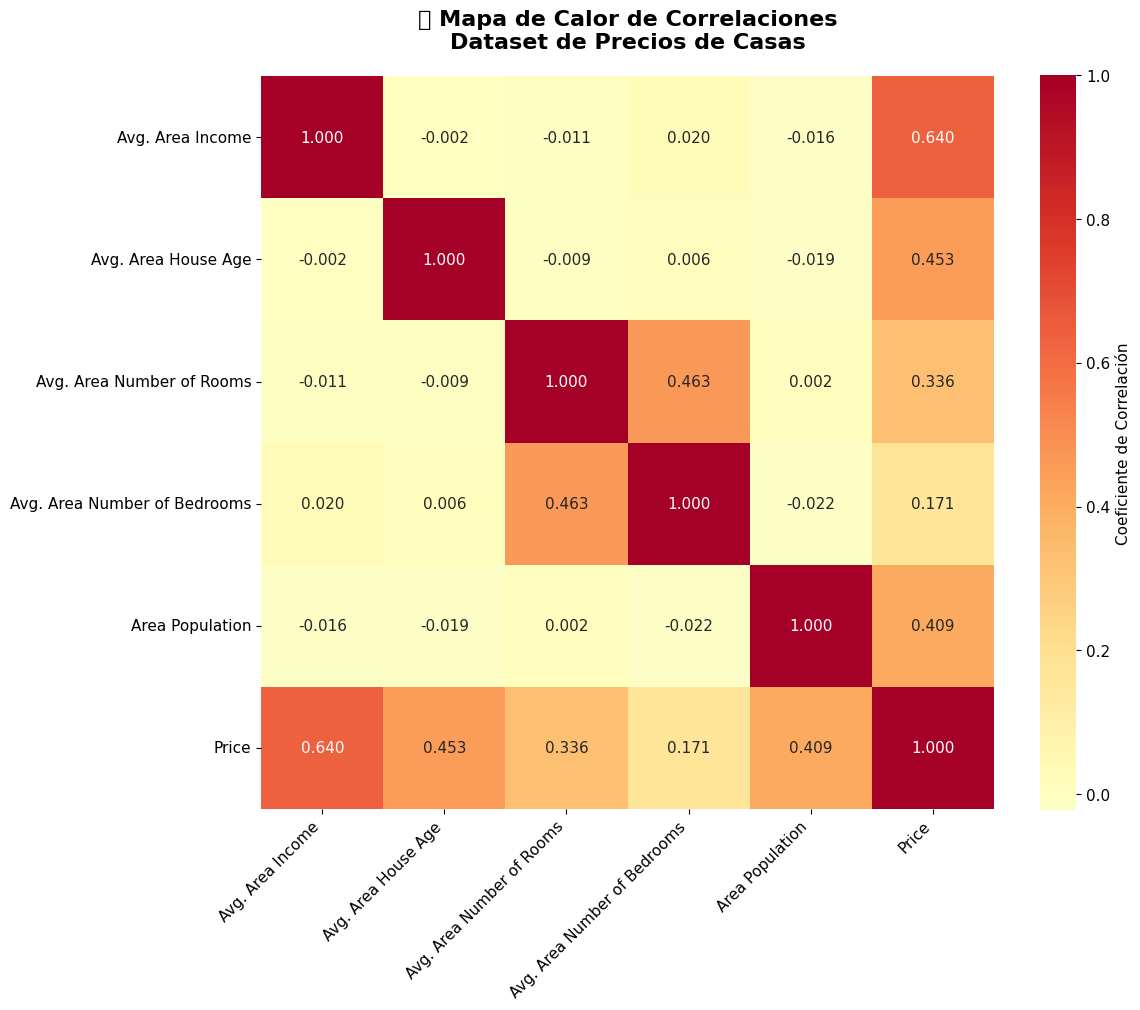


🎯 ANÁLISIS DE CORRELACIONES CON EL PRECIO:
🟠 FUERTE positiva: Avg. Area Income          (r = +0.640)
🟡 MODERADA positiva: Avg. Area House Age       (r = +0.453)
🟡 MODERADA positiva: Area Population           (r = +0.409)
🟢 DÉBIL positiva: Avg. Area Number of Rooms (r = +0.336)
⚪ MUY DÉBIL positiva: Avg. Area Number of Bedrooms (r = +0.171)

💡 INTERPRETACIÓN:
• r > 0.8: Variables muy relacionadas
• 0.6 < r ≤ 0.8: Variables fuertemente relacionadas
• 0.4 < r ≤ 0.6: Variables moderadamente relacionadas
• 0.2 < r ≤ 0.4: Variables débilmente relacionadas
• r ≤ 0.2: Variables muy débilmente relacionadas


In [4]:
# Creamos un mapa de calor de correlaciones
plt.figure(figsize=(12, 10))

# Calculamos la matriz de correlación
correlation_matrix = df.corr()

# Creamos el mapa de calor
sns.heatmap(correlation_matrix, 
            annot=True,           # Mostrar valores numéricos
            cmap='RdYlBu_r',      # Paleta de colores (rojo-amarillo-azul invertida)
            center=0,             # Centrar en 0
            square=True,          # Celdas cuadradas
            fmt='.3f',           # Formato de números (3 decimales)
            cbar_kws={'label': 'Coeficiente de Correlación'})

plt.title('🔗 Mapa de Calor de Correlaciones\nDataset de Precios de Casas', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Análisis detallado de correlaciones con el precio
print("\n🎯 ANÁLISIS DE CORRELACIONES CON EL PRECIO:")
print("=" * 55)

price_correlations = correlation_matrix['Price'].drop('Price').sort_values(ascending=False)

for variable, correlation in price_correlations.items():
    # Determinamos la fuerza de la correlación
    if abs(correlation) >= 0.8:
        fuerza = "🔴 MUY FUERTE"
    elif abs(correlation) >= 0.6:
        fuerza = "🟠 FUERTE"
    elif abs(correlation) >= 0.4:
        fuerza = "🟡 MODERADA"
    elif abs(correlation) >= 0.2:
        fuerza = "🟢 DÉBIL"
    else:
        fuerza = "⚪ MUY DÉBIL"
    
    direccion = "positiva" if correlation > 0 else "negativa"
    print(f"{fuerza} {direccion:>8}: {variable:<25} (r = {correlation:+.3f})")

print("\n💡 INTERPRETACIÓN:")
print("• r > 0.8: Variables muy relacionadas")
print("• 0.6 < r ≤ 0.8: Variables fuertemente relacionadas")
print("• 0.4 < r ≤ 0.6: Variables moderadamente relacionadas")
print("• 0.2 < r ≤ 0.4: Variables débilmente relacionadas")
print("• r ≤ 0.2: Variables muy débilmente relacionadas")

## 📊 5. Análisis de Variables Predictoras

### 5.1 Distribuciones de Variables Independientes
Analicemos la distribución de cada variable predictora:

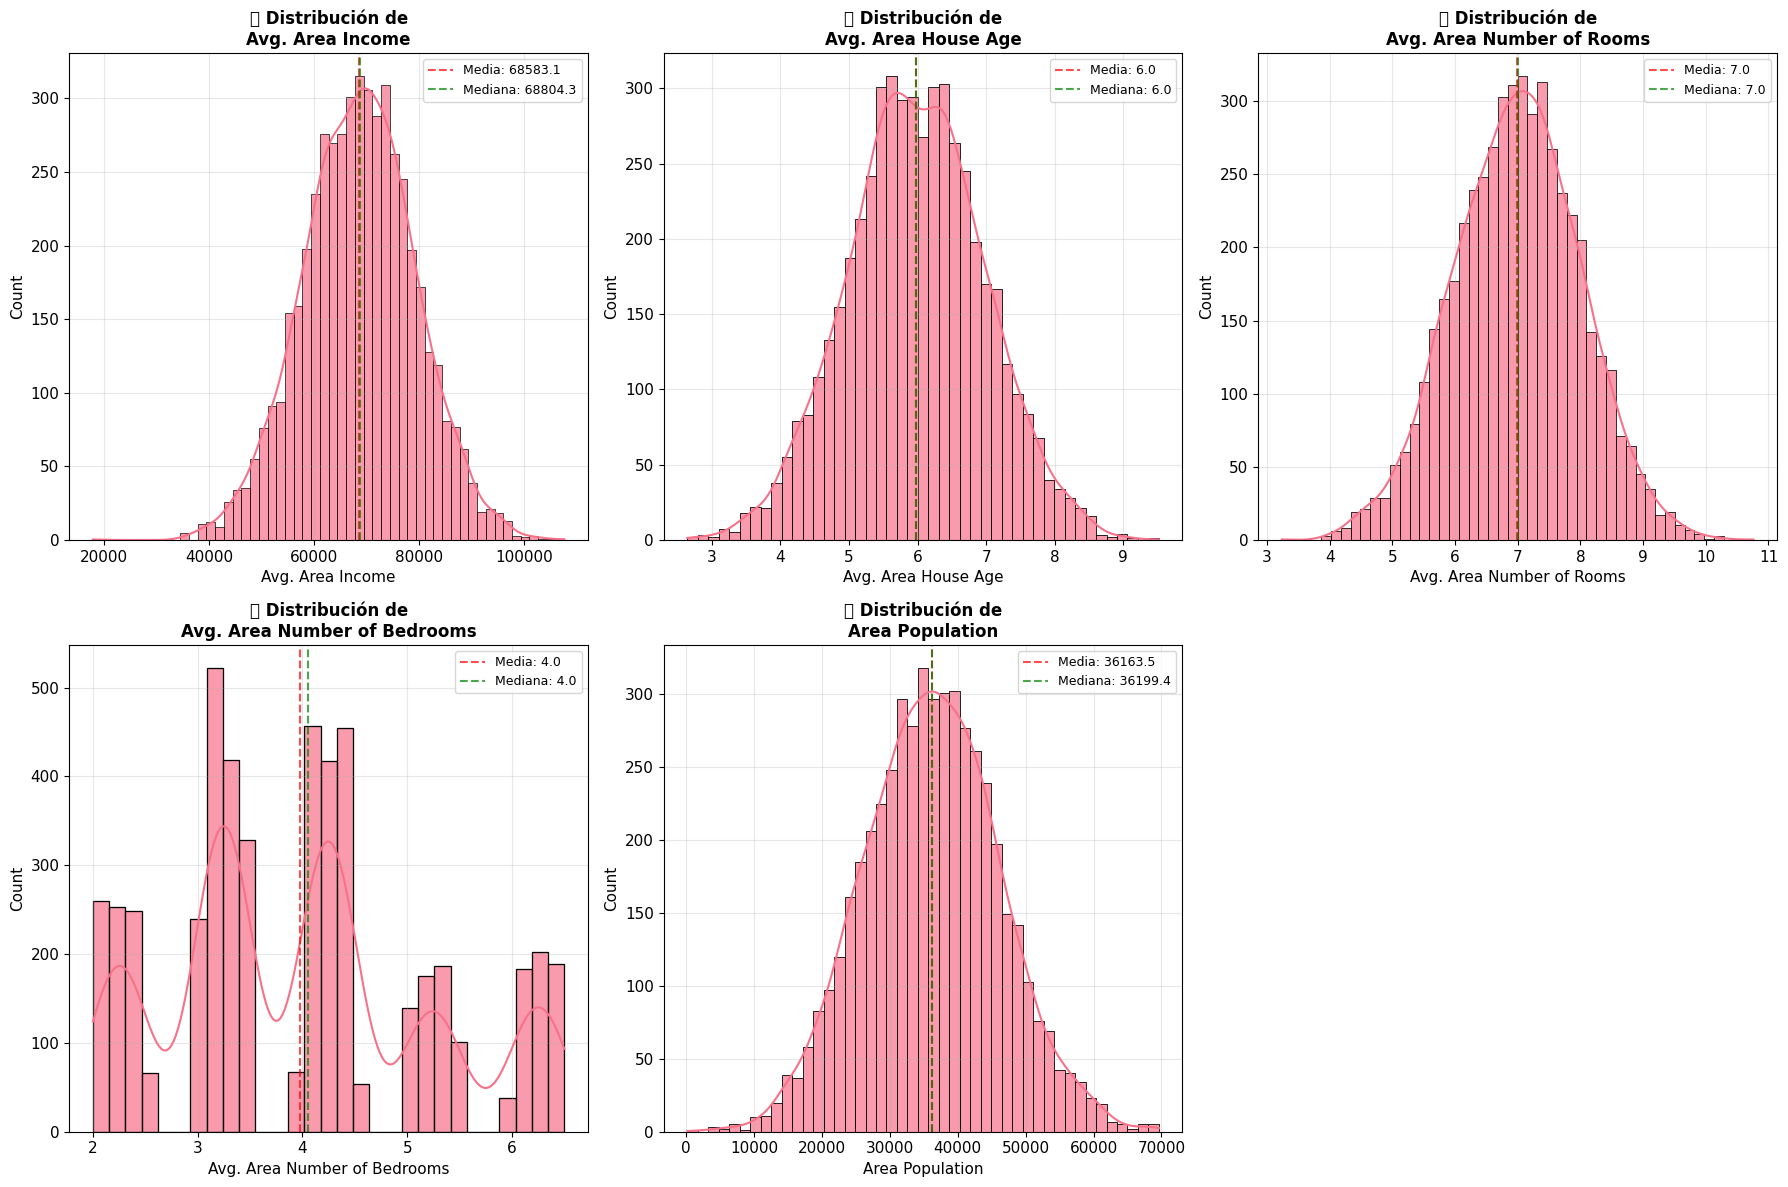


📈 RESUMEN ESTADÍSTICO DE VARIABLES PREDICTORAS:

🏷️ Avg. Area Income:
   Media: 68583.11 | Mediana: 68804.29 | Std: 10657.99
   Min:   17796.63 | Max:  107701.75 | Rango: 89905.12

🏷️ Avg. Area House Age:
   Media:     5.98 | Mediana:     5.97 | Std:     0.99
   Min:       2.64 | Max:       9.52 | Rango:     6.87

🏷️ Avg. Area Number of Rooms:
   Media:     6.99 | Mediana:     7.00 | Std:     1.01
   Min:       3.24 | Max:      10.76 | Rango:     7.52

🏷️ Avg. Area Number of Bedrooms:
   Media:     3.98 | Mediana:     4.05 | Std:     1.23
   Min:       2.00 | Max:       6.50 | Rango:     4.50

🏷️ Area Population:
   Media: 36163.52 | Mediana: 36199.41 | Std:  9925.65
   Min:     172.61 | Max:   69621.71 | Rango: 69449.10


In [5]:
# Variables predictoras
variables_predictoras = ['Avg. Area Income', 'Avg. Area House Age', 
                        'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 
                        'Area Population']

# Creamos subplots para las distribuciones
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()  # Convertimos a array 1D para fácil indexación

for i, variable in enumerate(variables_predictoras):
    # Histograma con curva de densidad
    sns.histplot(data=df, x=variable, kde=True, ax=axes[i], alpha=0.7)
    
    # Añadimos líneas de media y mediana
    media = df[variable].mean()
    mediana = df[variable].median()
    
    axes[i].axvline(media, color='red', linestyle='--', alpha=0.7, label=f'Media: {media:.1f}')
    axes[i].axvline(mediana, color='green', linestyle='--', alpha=0.7, label=f'Mediana: {mediana:.1f}')
    
    axes[i].set_title(f'📊 Distribución de\n{variable}', fontweight='bold', fontsize=12)
    axes[i].legend(fontsize=9)
    axes[i].grid(True, alpha=0.3)

# Eliminamos el subplot extra
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

# Estadísticas resumidas de todas las variables
print("\n📈 RESUMEN ESTADÍSTICO DE VARIABLES PREDICTORAS:")
print("=" * 65)
for variable in variables_predictoras:
    stats = df[variable].describe()
    print(f"\n🏷️ {variable}:")
    print(f"   Media: {stats['mean']:8.2f} | Mediana: {stats['50%']:8.2f} | Std: {stats['std']:8.2f}")
    print(f"   Min: {stats['min']:10.2f} | Max: {stats['max']:10.2f} | Rango: {stats['max']-stats['min']:8.2f}")

## 🎯 6. Análisis de Relaciones Bivariadas

### 6.1 Precio vs Variables Predictoras
Exploremos la relación entre el precio y cada variable predictora:

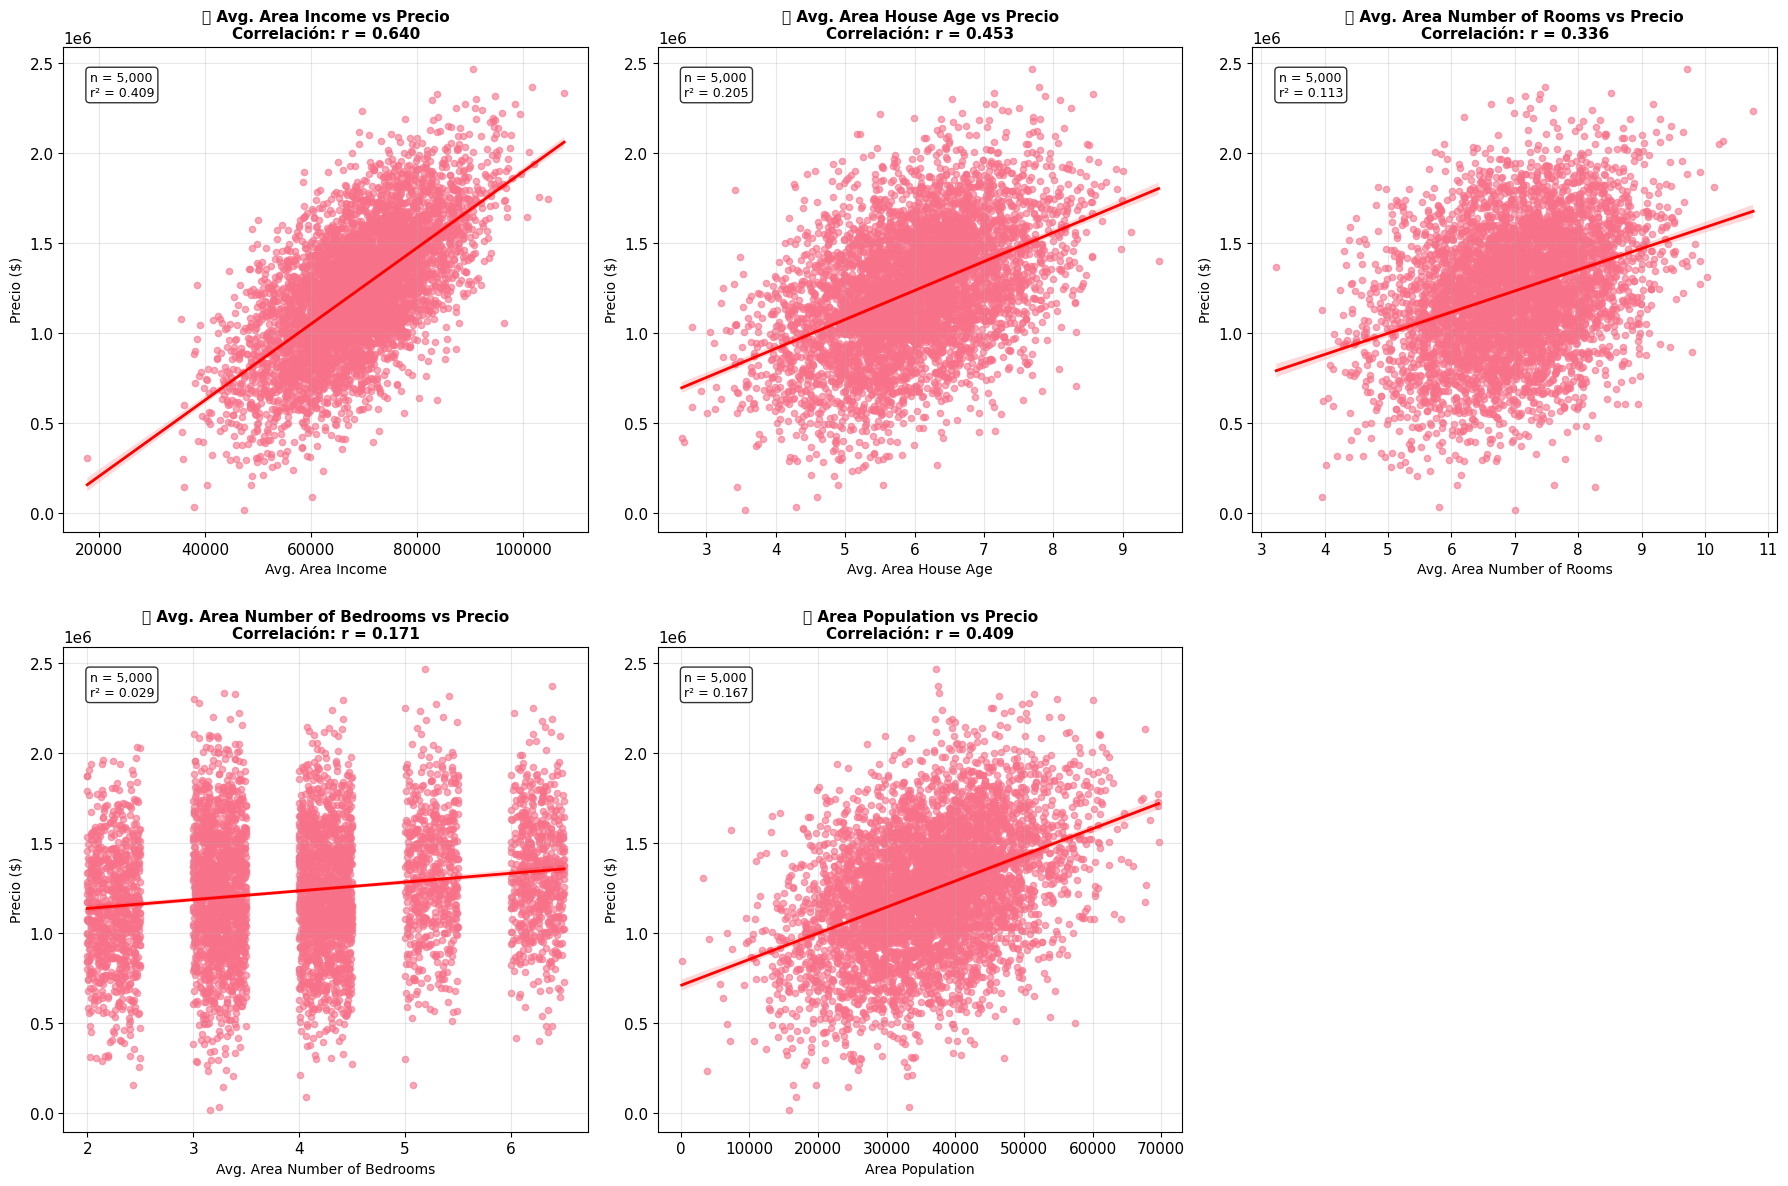


🔍 ANÁLISIS DE RELACIONES PRECIO vs VARIABLES:

📊 Avg. Area Income:
   Correlación: r = +0.640
   R²: 0.409 (40.9% de la varianza explicada)
   📈 Relación POSITIVA: A mayor avg. area income, mayor precio

📊 Avg. Area House Age:
   Correlación: r = +0.453
   R²: 0.205 (20.5% de la varianza explicada)
   📈 Relación POSITIVA: A mayor avg. area house age, mayor precio

📊 Avg. Area Number of Rooms:
   Correlación: r = +0.336
   R²: 0.113 (11.3% de la varianza explicada)
   📈 Relación POSITIVA: A mayor avg. area number of rooms, mayor precio

📊 Avg. Area Number of Bedrooms:
   Correlación: r = +0.171
   R²: 0.029 (2.9% de la varianza explicada)
   📈 Relación POSITIVA: A mayor avg. area number of bedrooms, mayor precio

📊 Area Population:
   Correlación: r = +0.409
   R²: 0.167 (16.7% de la varianza explicada)
   📈 Relación POSITIVA: A mayor area population, mayor precio


In [6]:
# Creamos gráficos de dispersión para cada variable vs precio
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, variable in enumerate(variables_predictoras):
    # Gráfico de dispersión con línea de regresión
    sns.regplot(data=df, x=variable, y='Price', ax=axes[i], 
                scatter_kws={'alpha': 0.6, 's': 20}, 
                line_kws={'color': 'red', 'linewidth': 2})
    
    # Calculamos el coeficiente de correlación
    correlation = df[variable].corr(df['Price'])
    
    axes[i].set_title(f'🎯 {variable} vs Precio\nCorrelación: r = {correlation:.3f}', 
                     fontweight='bold', fontsize=11)
    axes[i].set_xlabel(variable, fontsize=10)
    axes[i].set_ylabel('Precio ($)', fontsize=10)
    axes[i].grid(True, alpha=0.3)
    
    # Añadimos información estadística
    axes[i].text(0.05, 0.95, f'n = {len(df):,}\nr² = {correlation**2:.3f}', 
                transform=axes[i].transAxes, 
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                fontsize=9)

# Eliminamos el subplot extra
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

# Análisis de las relaciones
print("\n🔍 ANÁLISIS DE RELACIONES PRECIO vs VARIABLES:")
print("=" * 55)

for variable in variables_predictoras:
    correlation = df[variable].corr(df['Price'])
    r_squared = correlation ** 2
    
    print(f"\n📊 {variable}:")
    print(f"   Correlación: r = {correlation:+.3f}")
    print(f"   R²: {r_squared:.3f} ({r_squared*100:.1f}% de la varianza explicada)")
    
    if correlation > 0:
        print(f"   📈 Relación POSITIVA: A mayor {variable.lower()}, mayor precio")
    else:
        print(f"   📉 Relación NEGATIVA: A mayor {variable.lower()}, menor precio")

### 6.2 Matriz de Gráficos de Dispersión (Pairplot)
Creemos una matriz completa de relaciones entre todas las variables:

📊 Generando matriz de gráficos de dispersión...


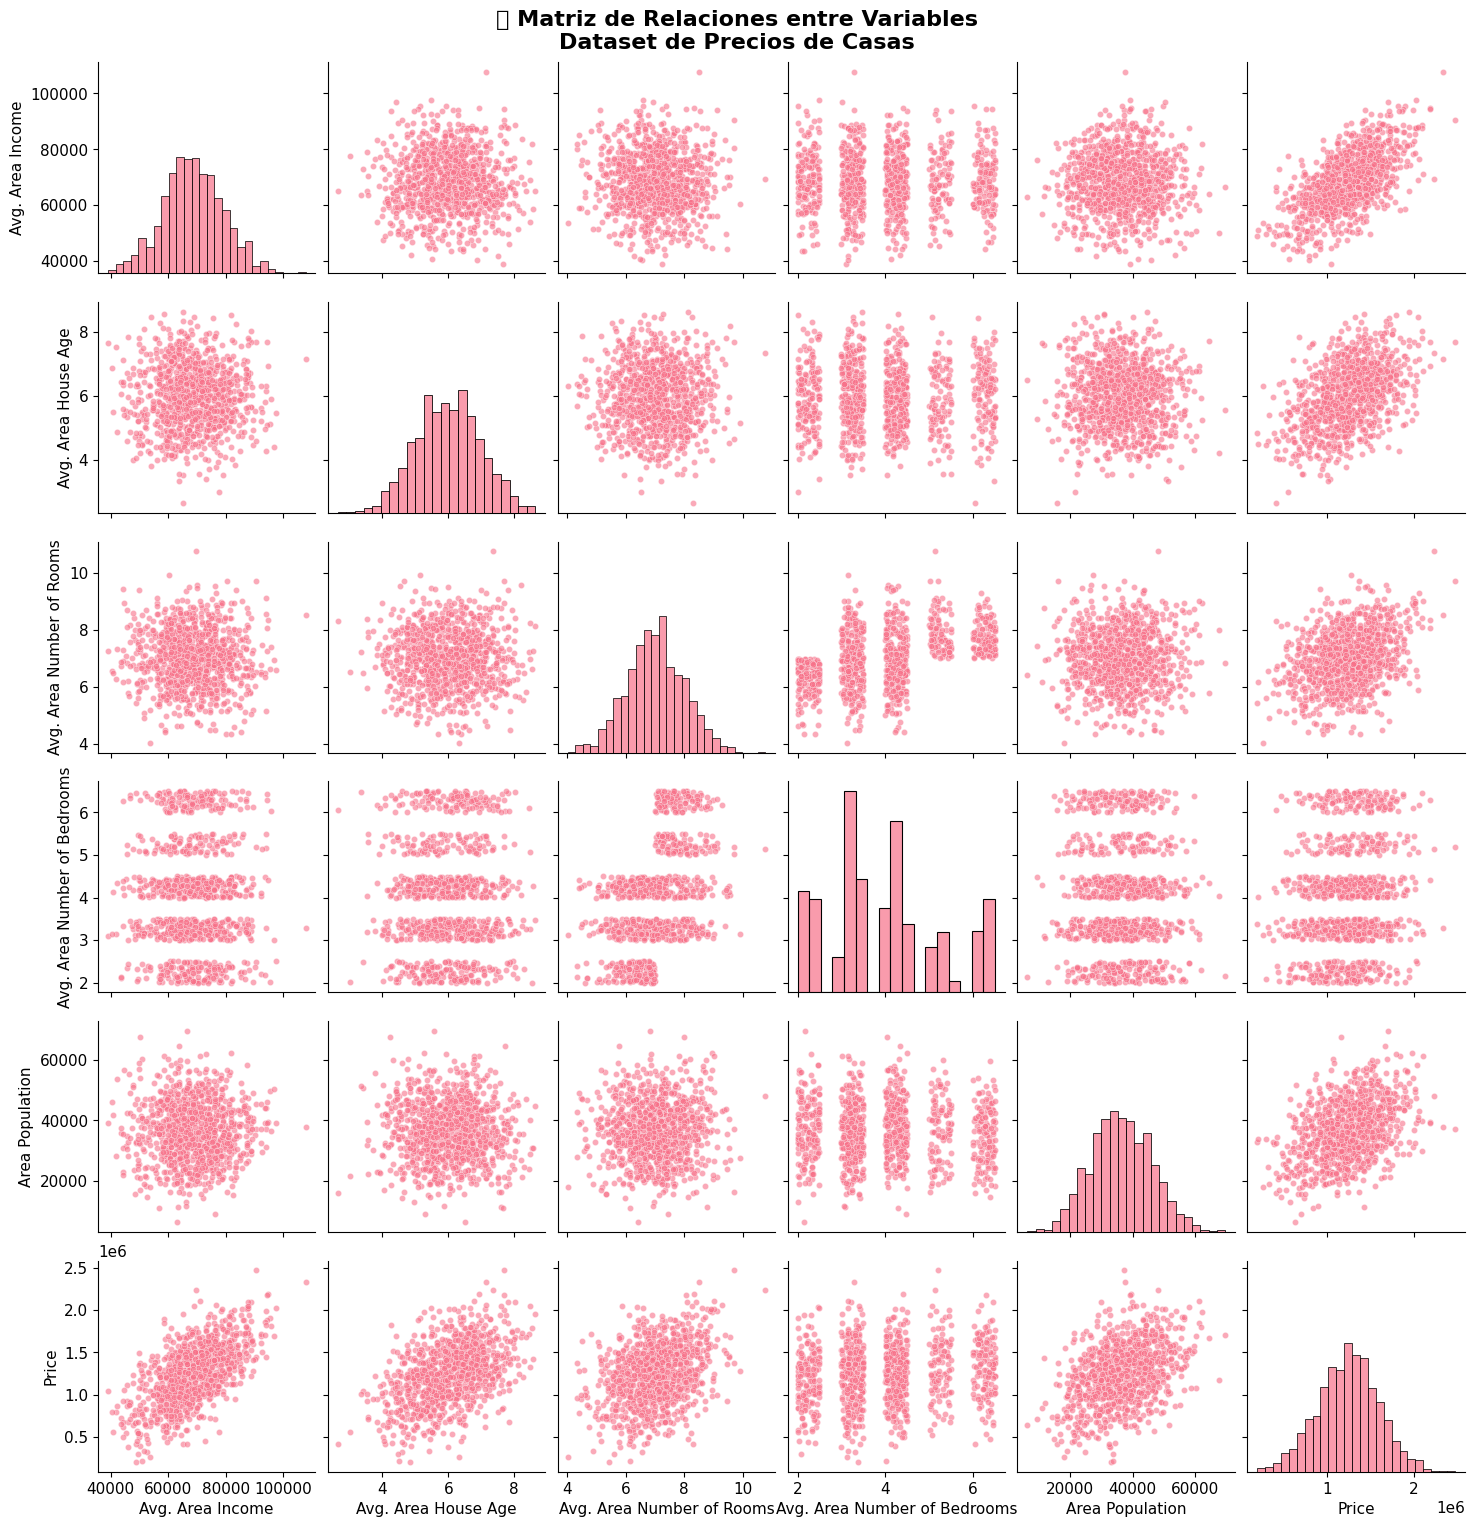


✅ Matriz generada con una muestra de 1,000 observaciones

💡 INTERPRETACIÓN DEL PAIRPLOT:
• Diagonal: Distribuciones de cada variable
• Fuera de la diagonal: Relaciones entre pares de variables
• Busca patrones lineales, curvilíneos o agrupaciones


In [7]:
# Creamos un pairplot para ver todas las relaciones
print("📊 Generando matriz de gráficos de dispersión...")

# Seleccionamos un subconjunto de datos para mejor visualización
sample_size = min(1000, len(df))  # Máximo 1000 puntos para mejor rendimiento
df_sample = df.sample(n=sample_size, random_state=42)

# Creamos el pairplot
g = sns.pairplot(df_sample, 
                 diag_kind='hist',    # Histogramas en la diagonal
                 plot_kws={'alpha': 0.6, 's': 20},  # Puntos más transparentes
                 diag_kws={'alpha': 0.7})  # Histogramas más transparentes

# Configuramos el título principal
g.fig.suptitle('🔗 Matriz de Relaciones entre Variables\nDataset de Precios de Casas', 
               fontsize=16, fontweight='bold', y=1.02)

plt.show()

print(f"\n✅ Matriz generada con una muestra de {sample_size:,} observaciones")
print("\n💡 INTERPRETACIÓN DEL PAIRPLOT:")
print("• Diagonal: Distribuciones de cada variable")
print("• Fuera de la diagonal: Relaciones entre pares de variables")
print("• Busca patrones lineales, curvilíneos o agrupaciones")

## 📊 7. Análisis de Outliers y Valores Extremos

### 7.1 Detección Visual de Outliers
Identifiquemos valores atípicos en nuestras variables:

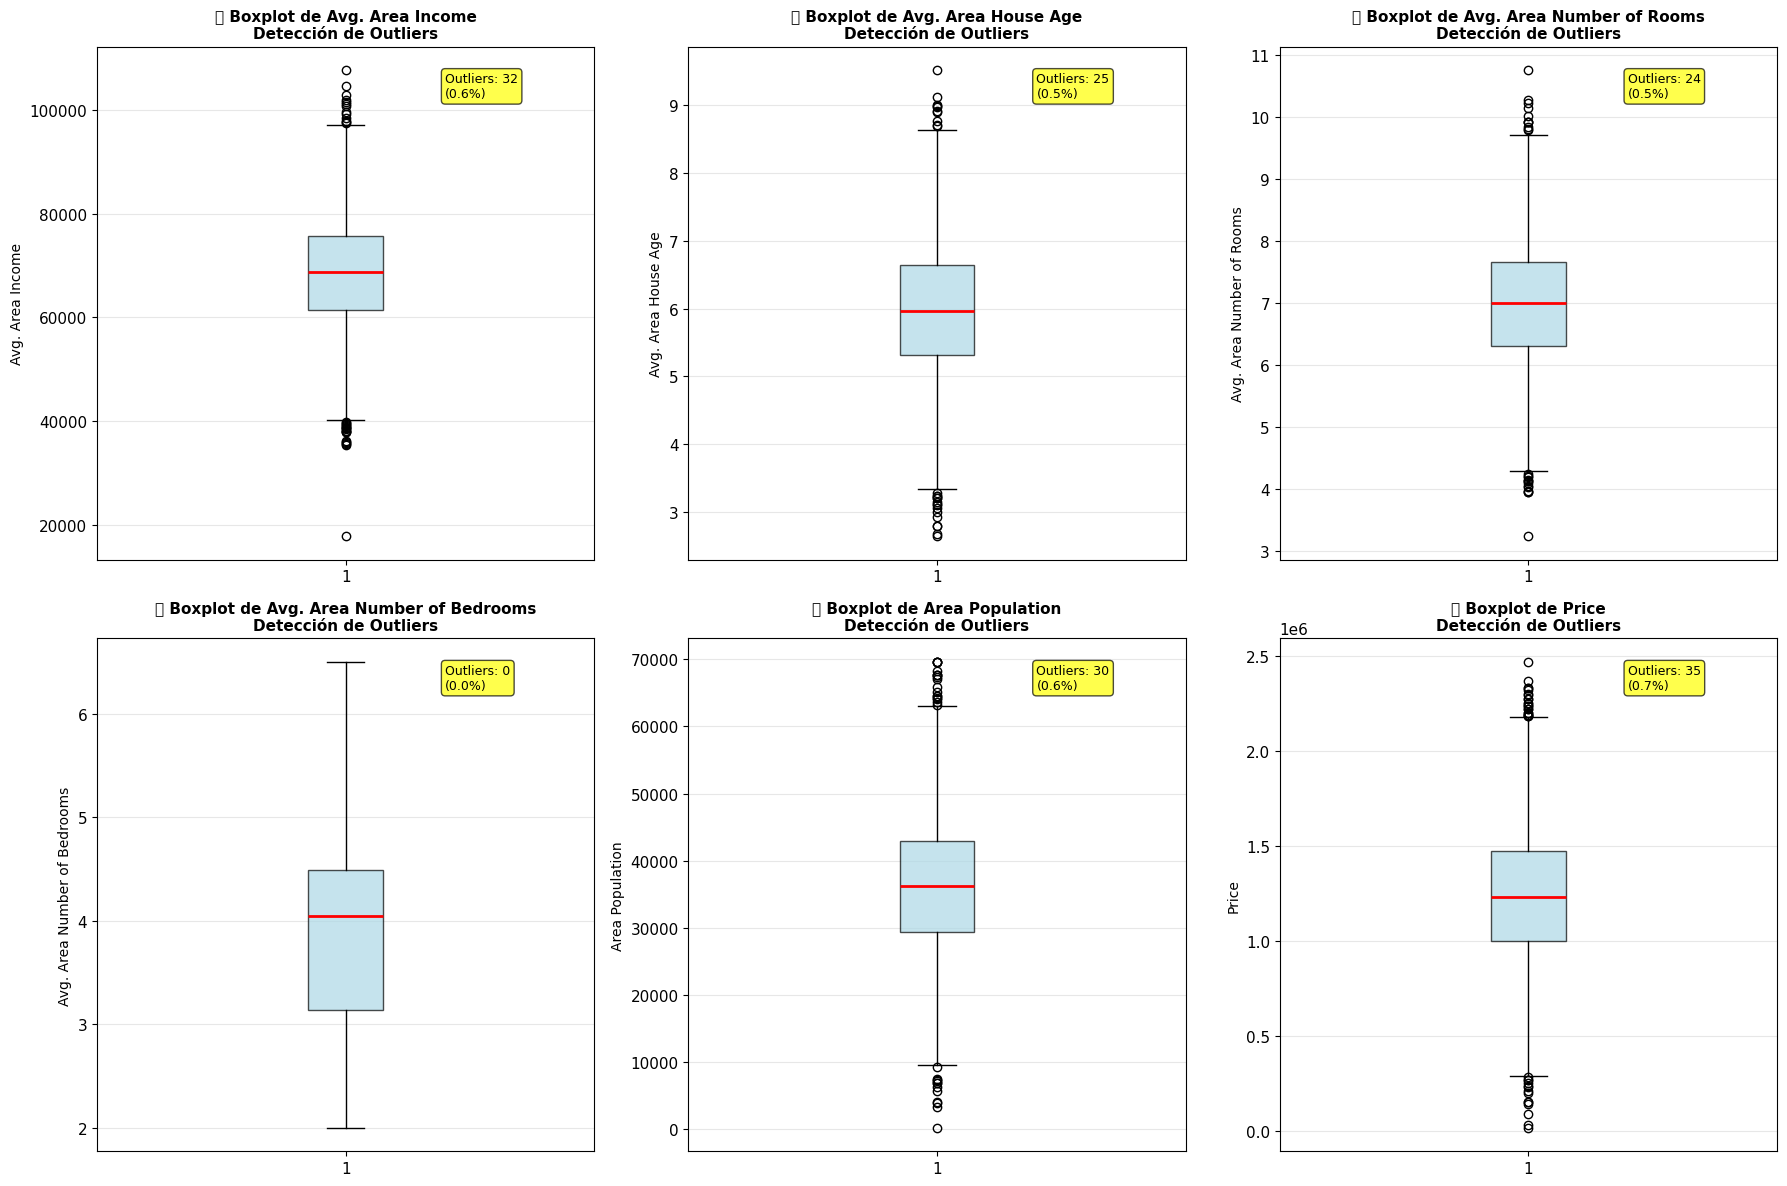


🔍 RESUMEN DE OUTLIERS (Método IQR):
Variable                  Outliers   Porcentaje   Límites (IQR)
----------------------------------------------------------------------
Avg. Area Income          32         0.6        % [40026, 97238]
Avg. Area House Age       25         0.5        % [3, 9]
Avg. Area Number of Rooms 24         0.5        % [4, 10]
Avg. Area Number of Bedrooms 0          0.0        % [1, 7]
Area Population           30         0.6        % [9218, 63047]
Price                     35         0.7        % [287128, 2181660]


In [8]:
# Boxplots para todas las variables para detectar outliers
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

all_variables = variables_predictoras + ['Price']

for i, variable in enumerate(all_variables):
    # Boxplot con puntos de outliers
    bp = axes[i].boxplot(df[variable], patch_artist=True, 
                        boxprops=dict(facecolor='lightblue', alpha=0.7),
                        medianprops=dict(color='red', linewidth=2))
    
    axes[i].set_title(f'📦 Boxplot de {variable}\nDetección de Outliers', 
                     fontweight='bold', fontsize=11)
    axes[i].set_ylabel(variable, fontsize=10)
    axes[i].grid(True, alpha=0.3, axis='y')
    
    # Calculamos estadísticas de outliers usando IQR
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)]
    outlier_percentage = len(outliers) / len(df) * 100
    
    # Añadimos información de outliers
    axes[i].text(0.7, 0.95, f'Outliers: {len(outliers)}\n({outlier_percentage:.1f}%)', 
                transform=axes[i].transAxes, 
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7),
                fontsize=9)

plt.tight_layout()
plt.show()

# Resumen de outliers
print("\n🔍 RESUMEN DE OUTLIERS (Método IQR):")
print("=" * 50)
print(f"{'Variable':<25} {'Outliers':<10} {'Porcentaje':<12} {'Límites (IQR)'}")
print("-" * 70)

for variable in all_variables:
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)]
    outlier_percentage = len(outliers) / len(df) * 100
    
    print(f"{variable:<25} {len(outliers):<10} {outlier_percentage:<11.1f}% [{lower_bound:.0f}, {upper_bound:.0f}]")

## 📋 8. Resumen Visual y Conclusiones

### 8.1 Dashboard de Métricas Clave

Font 'default' does not have a glyph for '\U0001f4cf' [U+1f4cf], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f4cf' [U+1f4cf], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f4cf' [U+1f4cf], substituting with a dummy symbol.


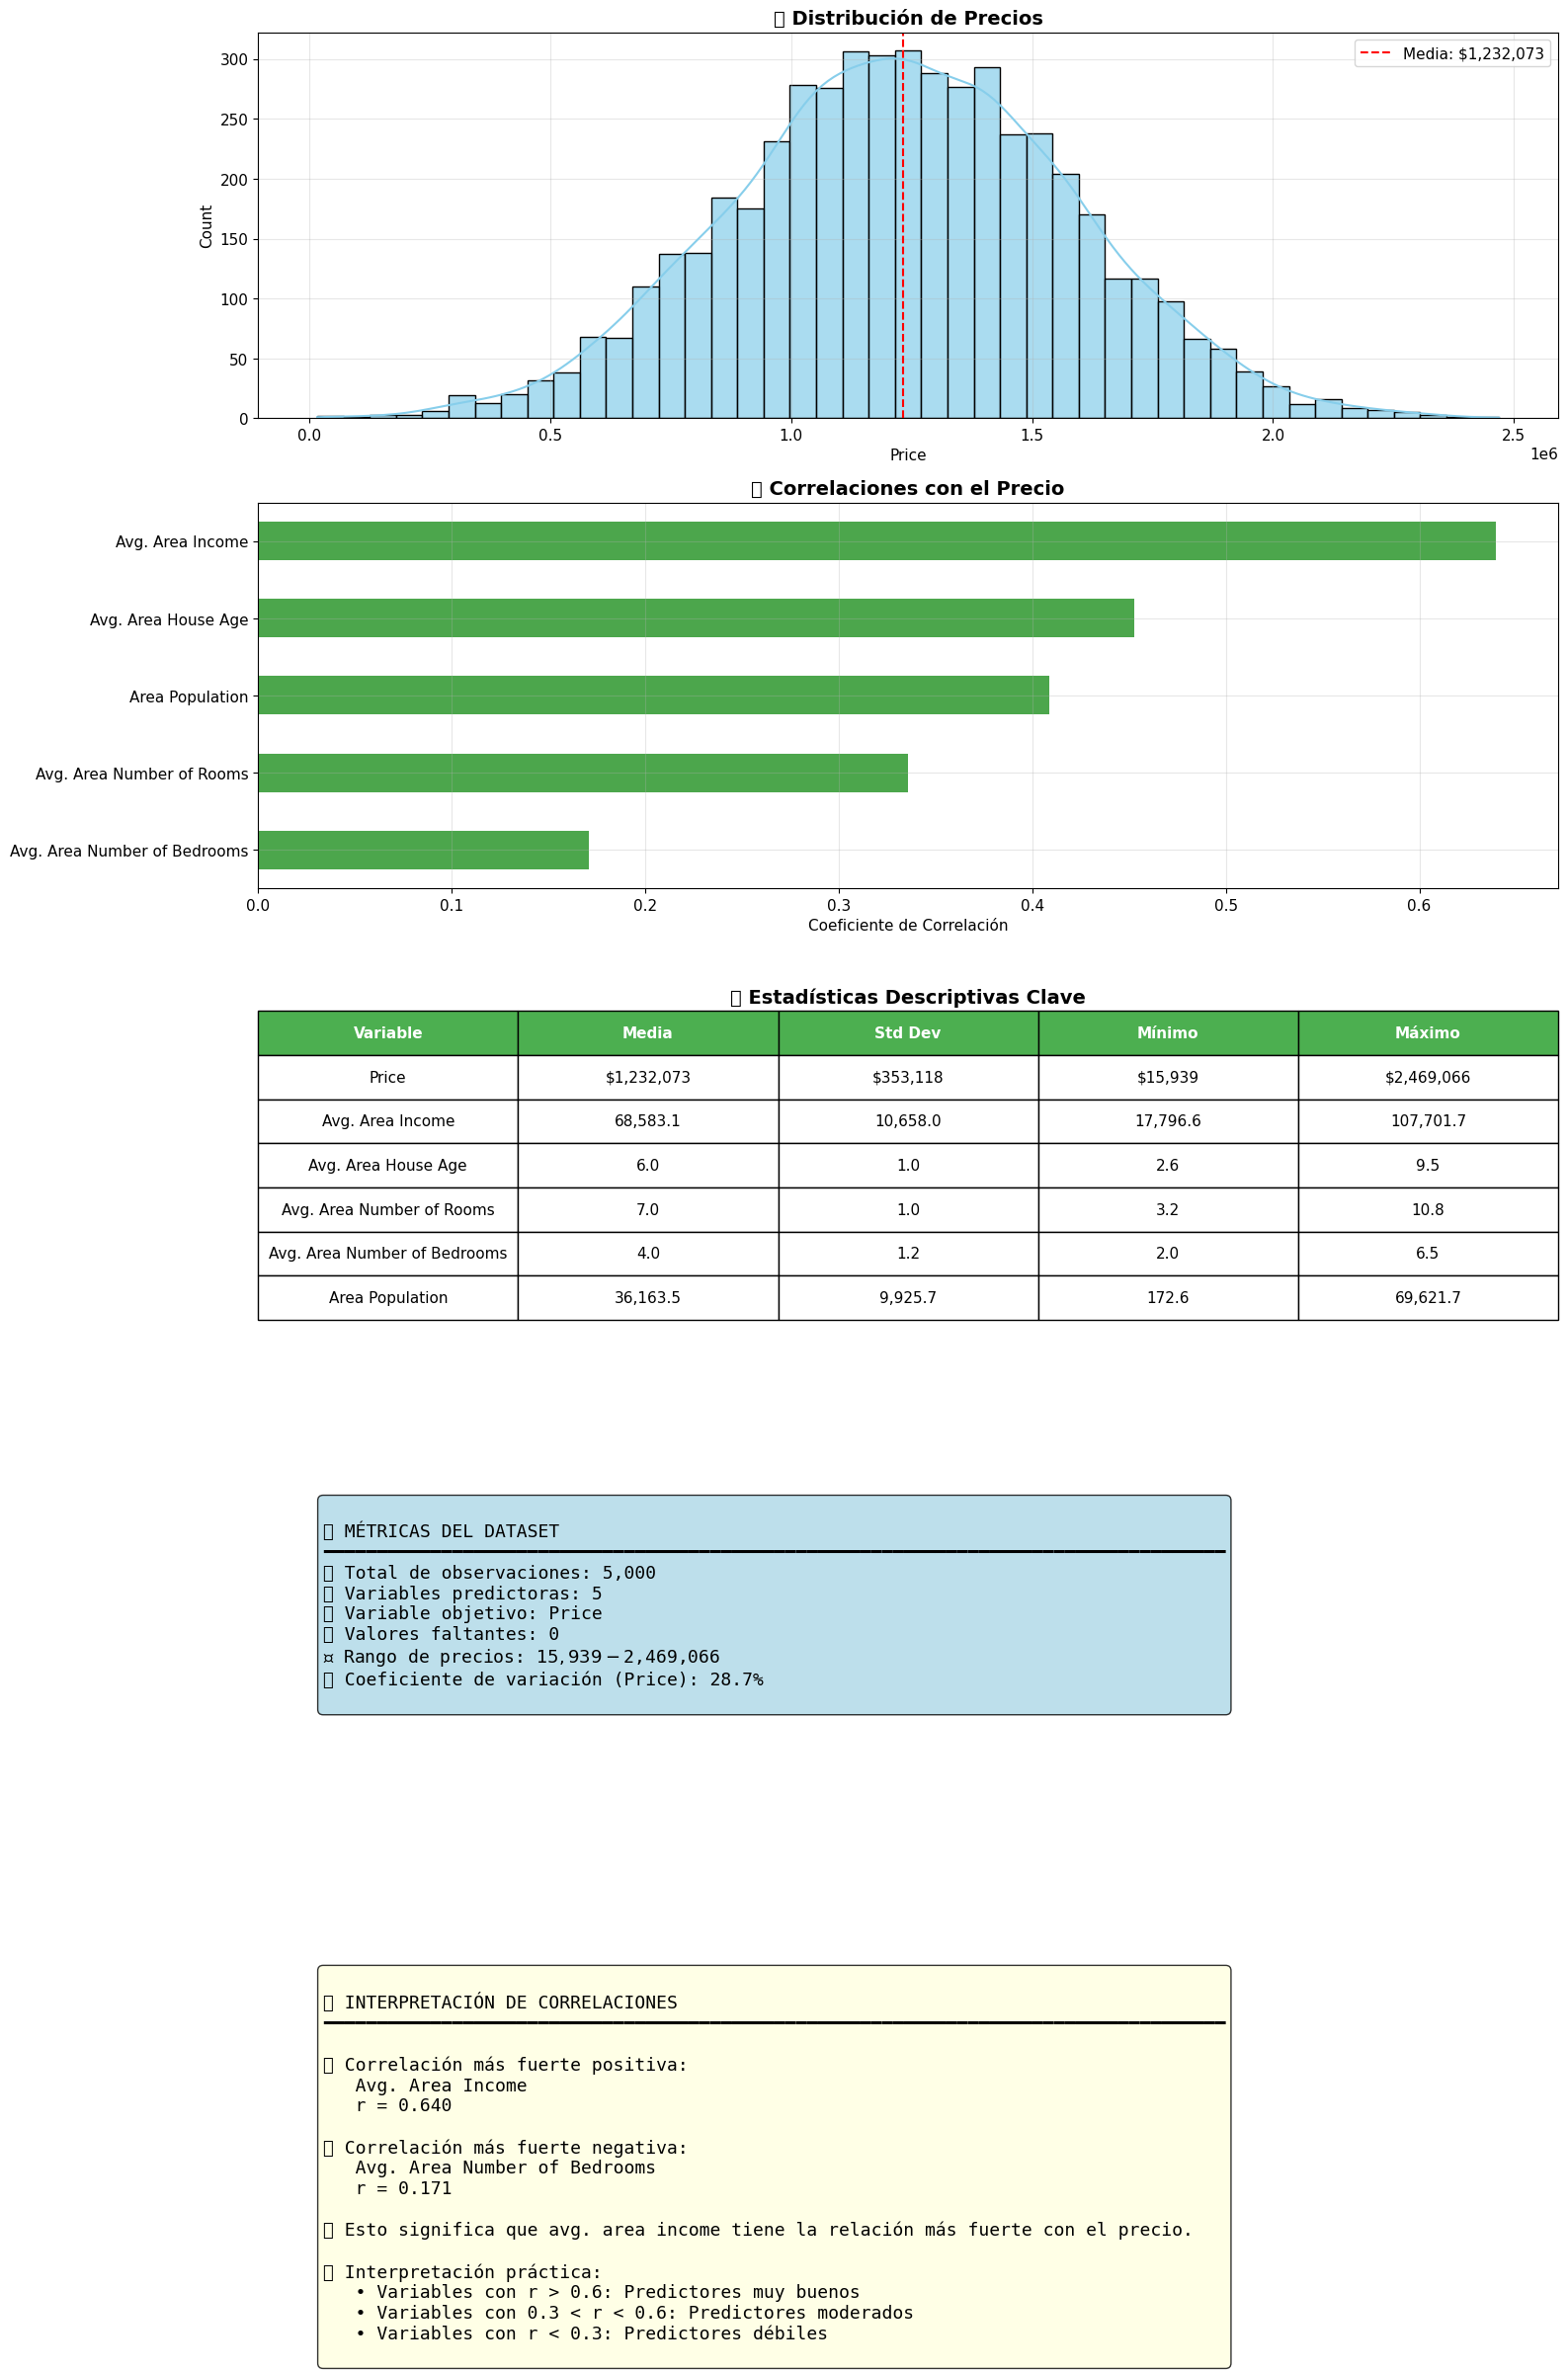


✅ Dashboard de visualización generado exitosamente


In [12]:
# Creamos un dashboard con las métricas más importantes organizadas verticalmente
fig, axes = plt.subplots(5, 1, figsize=(16, 25))
plt.subplots_adjust(hspace=0.4)  # Espacio vertical entre subplots

# 1. Distribución del precio
sns.histplot(df['Price'], kde=True, ax=axes[0], color='skyblue', alpha=0.7)
axes[0].axvline(df['Price'].mean(), color='red', linestyle='--', label=f'Media: ${df["Price"].mean():,.0f}')
axes[0].set_title('💰 Distribución de Precios', fontweight='bold', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Correlaciones con el precio
price_corr = df.corr()['Price'].drop('Price').sort_values(ascending=True)
colors = ['red' if x < 0 else 'green' for x in price_corr]
price_corr.plot(kind='barh', ax=axes[1], color=colors, alpha=0.7)
axes[1].set_title('🔗 Correlaciones con el Precio', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Coeficiente de Correlación')
axes[1].grid(True, alpha=0.3)

# 3. Tabla de estadísticas descriptivas
axes[2].axis('off')
stats_data = []
for variable in ['Price'] + variables_predictoras:
    stats = df[variable].describe()
    if variable == 'Price':
        stats_data.append([variable, f'${stats["mean"]:,.0f}', f'${stats["std"]:,.0f}', 
                          f'${stats["min"]:,.0f}', f'${stats["max"]:,.0f}'])
    else:
        stats_data.append([variable, f'{stats["mean"]:,.1f}', f'{stats["std"]:,.1f}', 
                          f'{stats["min"]:,.1f}', f'{stats["max"]:,.1f}'])

table = axes[2].table(cellText=stats_data,
                     colLabels=['Variable', 'Media', 'Std Dev', 'Mínimo', 'Máximo'],
                     cellLoc='center',
                     loc='center',
                     bbox=[0, 0.1, 1, 0.8])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)

# Coloreamos el header
for i in range(len(stats_data[0])):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

axes[2].set_title('📊 Estadísticas Descriptivas Clave', fontweight='bold', fontsize=14, y=0.9)

# 4. Métricas del dataset
axes[3].axis('off')
metrics_text = f"""
📈 MÉTRICAS DEL DATASET
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🔢 Total de observaciones: {len(df):,}
📊 Variables predictoras: {len(variables_predictoras)}
🎯 Variable objetivo: Price
❌ Valores faltantes: {df.isnull().sum().sum()}
📏 Rango de precios: ${df['Price'].min():,.0f} - ${df['Price'].max():,.0f}
📐 Coeficiente de variación (Price): {(df['Price'].std()/df['Price'].mean()*100):.1f}%
"""

axes[3].text(0.05, 0.85, metrics_text, transform=axes[3].transAxes, 
             verticalalignment='top', fontsize=13, fontfamily='monospace',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# 5. Interpretación de correlaciones
axes[4].axis('off')

# Encontramos las correlaciones más fuertes
strongest_positive = price_corr.max()
strongest_negative = price_corr.min()
strongest_pos_var = price_corr.idxmax()
strongest_neg_var = price_corr.idxmin()

interpretation_text = f"""
🔍 INTERPRETACIÓN DE CORRELACIONES
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🟢 Correlación más fuerte positiva:
   {strongest_pos_var}
   r = {strongest_positive:.3f}
   
🔴 Correlación más fuerte negativa:
   {strongest_neg_var}
   r = {strongest_negative:.3f}
   
💡 Esto significa que {strongest_pos_var.lower()} tiene la relación más fuerte con el precio.

📈 Interpretación práctica:
   • Variables con r > 0.6: Predictores muy buenos
   • Variables con 0.3 < r < 0.6: Predictores moderados
   • Variables con r < 0.3: Predictores débiles
"""

axes[4].text(0.05, 0.85, interpretation_text, transform=axes[4].transAxes, 
             verticalalignment='top', fontsize=13, fontfamily='monospace',
             bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n✅ Dashboard de visualización generado exitosamente")

## 📋 9. Conclusiones del Análisis Visual

### ✅ Hallazgos Principales:

In [10]:
# Generamos un resumen automático de hallazgos
print("\n" + "="*60)
print("📋 RESUMEN EJECUTIVO DEL ANÁLISIS VISUAL")
print("="*60)

# Análisis de la distribución del precio
price_skew = df['Price'].skew()
price_cv = df['Price'].std() / df['Price'].mean() * 100

print("\n🏠 ANÁLISIS DE LA VARIABLE OBJETIVO (PRECIO):")
print(f"   • Precio promedio: ${df['Price'].mean():,.2f}")
print(f"   • Rango de precios: ${df['Price'].min():,.0f} - ${df['Price'].max():,.0f}")
print(f"   • Variabilidad: {price_cv:.1f}% (coeficiente de variación)")
if abs(price_skew) < 0.5:
    print(f"   • Distribución: Aproximadamente normal (skew = {price_skew:.3f})")
else:
    skew_direction = "sesgada hacia la derecha" if price_skew > 0 else "sesgada hacia la izquierda"
    print(f"   • Distribución: {skew_direction.capitalize()} (skew = {price_skew:.3f})")

# Análisis de correlaciones
correlations = df.corr()['Price'].drop('Price')
strong_correlations = correlations[abs(correlations) > 0.5]
moderate_correlations = correlations[(abs(correlations) > 0.3) & (abs(correlations) <= 0.5)]

print("\n🔗 ANÁLISIS DE CORRELACIONES:")
if len(strong_correlations) > 0:
    print(f"   • Variables con correlación fuerte (|r| > 0.5): {len(strong_correlations)}")
    for var, corr in strong_correlations.items():
        print(f"     - {var}: r = {corr:.3f}")

if len(moderate_correlations) > 0:
    print(f"   • Variables con correlación moderada (0.3 < |r| ≤ 0.5): {len(moderate_correlations)}")
    for var, corr in moderate_correlations.items():
        print(f"     - {var}: r = {corr:.3f}")

# Análisis de outliers
total_outliers = 0
for variable in variables_predictoras + ['Price']:
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)]
    if len(outliers) > 0:
        total_outliers += len(outliers)

print("\n🔍 ANÁLISIS DE VALORES ATÍPICOS:")
print(f"   • Total de observaciones con outliers: {total_outliers}")
print(f"   • Porcentaje del dataset: {total_outliers/len(df)*100:.1f}%")
if total_outliers/len(df) < 0.05:
    print("   • Evaluación: Pocos outliers, dataset limpio")
elif total_outliers/len(df) < 0.1:
    print("   • Evaluación: Outliers moderados, considerar tratamiento")
else:
    print("   • Evaluación: Muchos outliers, revisar calidad de datos")

# Recomendaciones para el modelado
print("\n🎯 RECOMENDACIONES PARA EL MODELADO:")
print("   ✅ Variables más prometedoras para el modelo:")
best_predictors = correlations.abs().nlargest(3)
for var, corr in best_predictors.items():
    print(f"      - {var} (|r| = {abs(corr):.3f})")

print("\n   📊 Consideraciones adicionales:")
if price_cv > 30:
    print("      - Alta variabilidad en precios: considerar transformaciones")
if abs(price_skew) > 0.5:
    print("      - Distribución sesgada: considerar log-transformación")
if total_outliers/len(df) > 0.05:
    print("      - Presencia de outliers: evaluar estrategias de tratamiento")
    
print("\n" + "="*60)
print("📈 LISTO PARA EL NOTEBOOK 3: MACHINE LEARNING")
print("="*60)


📋 RESUMEN EJECUTIVO DEL ANÁLISIS VISUAL

🏠 ANÁLISIS DE LA VARIABLE OBJETIVO (PRECIO):
   • Precio promedio: $1,232,072.65
   • Rango de precios: $15,939 - $2,469,066
   • Variabilidad: 28.7% (coeficiente de variación)
   • Distribución: Aproximadamente normal (skew = -0.003)

🔗 ANÁLISIS DE CORRELACIONES:
   • Variables con correlación fuerte (|r| > 0.5): 1
     - Avg. Area Income: r = 0.640
   • Variables con correlación moderada (0.3 < |r| ≤ 0.5): 3
     - Avg. Area House Age: r = 0.453
     - Avg. Area Number of Rooms: r = 0.336
     - Area Population: r = 0.409

🔍 ANÁLISIS DE VALORES ATÍPICOS:
   • Total de observaciones con outliers: 146
   • Porcentaje del dataset: 2.9%
   • Evaluación: Pocos outliers, dataset limpio

🎯 RECOMENDACIONES PARA EL MODELADO:
   ✅ Variables más prometedoras para el modelo:
      - Avg. Area Income (|r| = 0.640)
      - Avg. Area House Age (|r| = 0.453)
      - Area Population (|r| = 0.409)

   📊 Consideraciones adicionales:

📈 LISTO PARA EL NOTEBOOK 3:

## 🎓 Reflexiones Finales

### 💡 Lo que hemos aprendido:
1. **Visualización de distribuciones**: Histogramas y boxplots nos ayudan a entender la forma de nuestros datos
2. **Análisis de correlaciones**: Los mapas de calor revelan relaciones entre variables
3. **Detección de outliers**: Los boxplots identifican valores atípicos que pueden afectar el modelo
4. **Relaciones bivariadas**: Los gráficos de dispersión muestran cómo se relacionan las variables con el precio
5. **Patrones globales**: El pairplot nos da una vista completa de todas las relaciones

### 📈 Próximo paso:
Con esta comprensión visual profunda de nuestros datos, estamos listos para construir y evaluar nuestro modelo de machine learning en el **Notebook 3**.

---
**🎯 Mensaje clave**: Las visualizaciones no son solo "bonitas", son herramientas analíticas poderosas que nos guían en la construcción de mejores modelos predictivos.